di project ini kita menggunakan data belanja customer beberapa bulan kebelakang dari Online Retail.csv
nah dari dat aini kita mencoba mengklompokan/clustering menggunakan metode RFM selain itu kita juga akan mengclustering menggunakan
k-means dan dbscan lewat dua variabel saja,misal r dan m,atau m dan f,dari hasil segmentasi tadi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
data = pd.read_excel("Online Retail.xlsx")

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.shape

(541909, 8)

cek ada fitur yang nan ga,dan ada ga yang diatas 30 persen

In [5]:
tab_info=pd.DataFrame(data.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(data.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(data.isnull().sum()/data.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,object,object,object,int64,datetime64[ns],float64,float64,object
null values (nb),0,0,1454,0,0,0,135080,0
null values (%),0,0,0.268311,0,0,0,24.9267,0


karena data yang nan adalah customerID dan jumlahnya dibawah 30 persen,karena customerID tidak bisa kita isi berdasarkan apapun makanya kita drop saja

In [6]:
data.dropna(subset=['CustomerID'],inplace=True)

In [7]:
data.shape

(406829, 8)

data terbaru dari 54rb row menjadi 40rb

In [8]:
tab_info=pd.DataFrame(data.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(data.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(data.isnull().sum()/data.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,object,object,object,int64,datetime64[ns],float64,float64,object
null values (nb),0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0


data sudah bersih semua,sekarang kita cek type dari setiap kolom sudah sesuai belum


customer id harusnya object

In [9]:
data['CustomerID']= data['CustomerID'].astype(str)

In [10]:
tab_info=pd.DataFrame(data.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(data.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(data.isnull().sum()/data.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,object,object,object,int64,datetime64[ns],float64,object,object
null values (nb),0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0


In [11]:
data['Country'].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [12]:
data.shape

(406829, 8)

In [14]:
# buang data duplicate

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
data.shape

(401604, 8)

seperti dijelaskan di kaggle,untuk invoice C menandakan bahwa ada orderan yang dicancel,maka dari itu saya ingin menyisihkan data tersebut dan memasukannya ke dalam ordercancel,yang akan kita analisis lebih jauh nantinya

In [18]:
ordercancel=data[data['InvoiceNo'].str[0:1] =='C']
ordercancel

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [19]:
#lalu saya memfilter data yang bukan ordercancel

In [20]:
data=data[data['InvoiceNo'].str[0:1] !='C']
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [22]:
data.shape

(392732, 8)

## check bisnis logicnya



*1.unit price ga mungkin minus*
2.quantity ga mungkin minus

In [30]:
data['Quantity'].min()

1

In [31]:
data['UnitPrice'].min()

0.0

filter aja deh yang kuantitasnya minus


In [32]:
data = data[(data['Quantity']>=0)]

In [33]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [34]:
#selanjutnya saya ingin melihat aapa aja produk yang hargannya 0

In [35]:
#produk yang harganya 0 bisa kita asumsikan ada produk yang gratis di berikan oleh perusahaan,misalkan kita beli barang A terus gratis piring cantik,dan promo promo sejenisnya

In [36]:
#karena analisis kita basisnya adalah RFM,yang mana nilai M atau monetary itu berdasarkan total sales dari suatu pembelian,yaitu quantity dikali dengan unitprice,maka dari itu produk yang harganya 0 tidak akan memberikan nilai pada MOnetary kita,jadi sebaiknya kita sisihkan saja dulu

#dan juga data yang harganya 0 juga tidak terlalu banyak hanya 40 riwayat pembelian

In [37]:
nol=data[(data['UnitPrice']==0)]

In [38]:
nol

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom


In [33]:
nol.shape

(40, 8)

In [39]:
# filter data yaang harganya ga 0

In [40]:
data=data[(data['UnitPrice']!=0)]  

In [41]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [42]:
data.shape

(392692, 8)

# EDA

In [43]:
#mengubah tipe kolom invoice date ke datetime

In [44]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [46]:
#dari kolom datetime tadi saya hanya ingin menampilkan hari bulan dan tanggal pada kolom baru

In [47]:
data['date_Mon_Year'] = data['InvoiceDate'].dt.strftime('%d-%b-%Y')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date_Mon_Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,01-Dec-2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,01-Dec-2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,01-Dec-2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,01-Dec-2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,01-Dec-2010
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,09-Dec-2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,09-Dec-2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,09-Dec-2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,09-Dec-2011


## bulan penjualan terbaik

In [49]:
#lalu saya ingin tahu bulan penjualan terbaik maka dari itu saya buat kolom baru yang hanya mengambil bulannya saja

In [50]:
data['Month'] = data['date_Mon_Year'].str[3:6]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date_Mon_Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,01-Dec-2010,Dec
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,01-Dec-2010,Dec
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,01-Dec-2010,Dec
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,01-Dec-2010,Dec
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,01-Dec-2010,Dec
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,09-Dec-2011,Dec
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,09-Dec-2011,Dec
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,09-Dec-2011,Dec
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,09-Dec-2011,Dec


In [52]:
#membuat kolom baru yaitu total amount

In [53]:
data['TotalAmount'] =data['Quantity'] * data['UnitPrice']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date_Mon_Year,Month,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,01-Dec-2010,Dec,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,01-Dec-2010,Dec,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,01-Dec-2010,Dec,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,01-Dec-2010,Dec,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,01-Dec-2010,Dec,20.34
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,09-Dec-2011,Dec,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,09-Dec-2011,Dec,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,09-Dec-2011,Dec,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,09-Dec-2011,Dec,16.60


In [55]:
results=data.groupby('Month').sum()

In [56]:
results

,Quantity,UnitPrice,TotalAmount
Month,,,
Apr,291366,78543.481,468374.331
Aug,397373,78877.090,644051.040
Dec,597825,127239.300,1087613.170
Feb,265027,62619.480,446084.920
Jan,348473,66234.650,568101.310
Jul,367360,75454.521,598962.901
Jun,363014,84602.660,660046.050
Mar,347582,87864.790,594081.760
May,372864,101500.910,677355.150


In [57]:
results.sort_values(by='TotalAmount')

,Quantity,UnitPrice,TotalAmount
Month,,,
Feb,265027,62619.480,446084.920
Apr,291366,78543.481,468374.331
Jan,348473,66234.650,568101.310
Mar,347582,87864.790,594081.760
Jul,367360,75454.521,598962.901
Aug,397373,78877.090,644051.040
Jun,363014,84602.660,660046.050
May,372864,101500.910,677355.150
Sep,543652,118160.322,950690.202


In [58]:
results = results.reset_index()

In [59]:
results

,Month,Quantity,UnitPrice,TotalAmount
0,Apr,291366,78543.481,468374.331
1,Aug,397373,78877.090,644051.040
2,Dec,597825,127239.300,1087613.170
3,Feb,265027,62619.480,446084.920
4,Jan,348473,66234.650,568101.310
5,Jul,367360,75454.521,598962.901
6,Jun,363014,84602.660,660046.050
7,Mar,347582,87864.790,594081.760
8,May,372864,101500.910,677355.150
9,Nov,665923,182340.090,1156205.610


In [60]:
hasil = results.sort_values(by='TotalAmount')

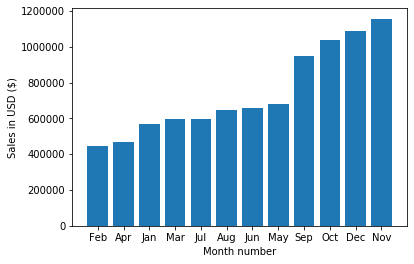

In [61]:
plt.bar(hasil['Month'],hasil['TotalAmount'])
plt.xticks(results['Month'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

bisa dilihat penjualan terbaik ada dibulan september sampai november broo

terus kita lihat lagi nih jam jam paling sering lakunya tuh jamb berapa sih

In [62]:
data['Hour'] = pd.to_datetime(data['InvoiceDate']).dt.hour
data['Minute'] = pd.to_datetime(data['InvoiceDate']).dt.minute
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date_Mon_Year,Month,TotalAmount,Hour,Minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,01-Dec-2010,Dec,15.30,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,01-Dec-2010,Dec,20.34,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,01-Dec-2010,Dec,22.00,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,01-Dec-2010,Dec,20.34,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,01-Dec-2010,Dec,20.34,8,26


In [63]:
hours = [hour for hour, df in data.groupby(['Hour'])]

In [64]:
hours

[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [65]:
jam =data.groupby(['Hour']).count()
jam

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date_Mon_Year,Month,TotalAmount,Minute
Hour,,,,,,,,,,,,
6,1,1,1,1,1,1,1,1,1,1,1,1
7,379,379,379,379,379,379,379,379,379,379,379,379
8,8687,8687,8687,8687,8687,8687,8687,8687,8687,8687,8687,8687
9,21927,21927,21927,21927,21927,21927,21927,21927,21927,21927,21927,21927
10,37773,37773,37773,37773,37773,37773,37773,37773,37773,37773,37773,37773
11,48365,48365,48365,48365,48365,48365,48365,48365,48365,48365,48365,48365
12,70938,70938,70938,70938,70938,70938,70938,70938,70938,70938,70938,70938
13,63019,63019,63019,63019,63019,63019,63019,63019,63019,63019,63019,63019
14,53251,53251,53251,53251,53251,53251,53251,53251,53251,53251,53251,53251


In [67]:
jam.sort_values(by='InvoiceNo')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date_Mon_Year,Month,TotalAmount,Minute
Hour,,,,,,,,,,,,
6,1,1,1,1,1,1,1,1,1,1,1,1
7,379,379,379,379,379,379,379,379,379,379,379,379
20,778,778,778,778,778,778,778,778,778,778,778,778
18,2895,2895,2895,2895,2895,2895,2895,2895,2895,2895,2895,2895
19,3233,3233,3233,3233,3233,3233,3233,3233,3233,3233,3233,3233
8,8687,8687,8687,8687,8687,8687,8687,8687,8687,8687,8687,8687
17,12941,12941,12941,12941,12941,12941,12941,12941,12941,12941,12941,12941
9,21927,21927,21927,21927,21927,21927,21927,21927,21927,21927,21927,21927
16,23715,23715,23715,23715,23715,23715,23715,23715,23715,23715,23715,23715


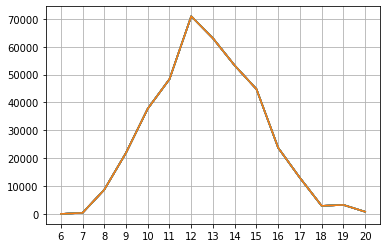

In [68]:
plt.plot(hours,data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.show()

# RFM #Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 



In [71]:

import datetime as dt

In [72]:
## cari data invoice terakir dan set hari terakir pake lastdate

In [73]:
data['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [74]:
#setinggi latest datenya itu 1 hari setelah max date invoice

Latest_Date = dt.datetime(2011,12,10)

In [75]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date_Mon_Year,Month,TotalAmount,Hour,Minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,01-Dec-2010,Dec,15.30,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,01-Dec-2010,Dec,20.34,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,01-Dec-2010,Dec,22.00,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,01-Dec-2010,Dec,20.34,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,01-Dec-2010,Dec,20.34,8,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,09-Dec-2011,Dec,10.20,12,50
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,09-Dec-2011,Dec,12.60,12,50
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,09-Dec-2011,Dec,16.60,12,50
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,09-Dec-2011,Dec,16.60,12,50


In [77]:
#buat RFM Modelling untuk setiap customer
RFMScores = data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 
                                                'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})


In [78]:
RFMScores

,InvoiceDate,InvoiceNo,TotalAmount
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [79]:
tab_info=pd.DataFrame(RFMScores.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(RFMScores.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(RFMScores.isnull().sum()/RFMScores.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)

,InvoiceDate,InvoiceNo,TotalAmount
column type,int64,int64,float64
null values (nb),0,0,0
null values (%),0,0,0


In [80]:
#ganti nama kolom to Recency, Frequency and Monetary
RFMScores.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

In [81]:
RFMScores

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [82]:
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [83]:
#Descriptive Statistics (Recency)
RFMScores.Recency.describe()

count    4338.000000
mean       92.059474
std       100.012264
min         0.000000
25%        17.000000
50%        50.000000
75%       141.750000
max       373.000000
Name: Recency, dtype: float64

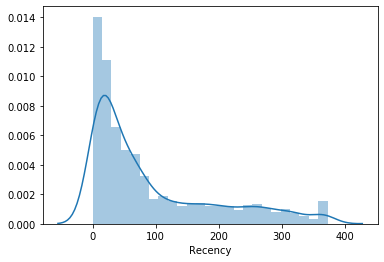

In [84]:
#Recency distribution plot
import seaborn as sns
x = RFMScores['Recency']

ax = sns.distplot(x)

In [85]:
## masih bagus kurvanya berati masih banyak customer yang beli akhir akhir ini
### recency semakin kecil semakin bagus

In [86]:
#Descriptive Statistics (Frequency)
RFMScores.Frequency.describe()

count    4338.000000
mean       90.523744
std       225.506968
min         1.000000
25%        17.000000
50%        41.000000
75%        98.000000
max      7676.000000
Name: Frequency, dtype: float64

In [87]:
# semakin tinggi semakin bagus

In [88]:
b=RFMScores[RFMScores['Frequency']<100]

In [89]:
c=b['Frequency']

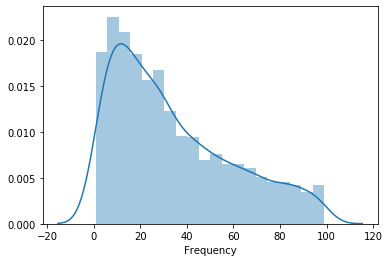

In [90]:
ax = sns.distplot(c)

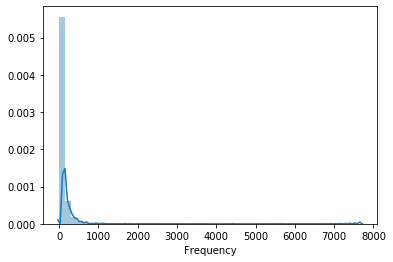

In [91]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = RFMScores['Frequency']

ax = sns.distplot(x)

In [92]:
d=RFMScores[RFMScores['Frequency']>1000]
d

,Recency,Frequency,Monetary
CustomerID,,,
12748.0,0,4412,33053.19
13081.0,11,1024,28337.38
13089.0,2,1814,58762.08
13263.0,1,1667,7436.93
14056.0,1,1088,8152.71
14096.0,4,5111,65164.79
14156.0,9,1395,117210.08
14159.0,19,1175,4630.35
14298.0,8,1637,51527.30


In [93]:
e=d['Frequency']

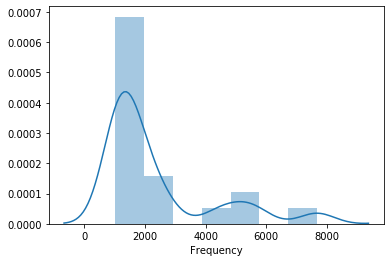

In [94]:
ax = sns.distplot(e)

In [95]:
RFMScores.Monetary.describe()

count      4338.000000
mean       2048.688081
std        8985.230220
min           3.750000
25%         306.482500
50%         668.570000
75%        1660.597500
max      280206.020000
Name: Monetary, dtype: float64

In [96]:
RFMScores.Monetary.mode()

0    76.32
dtype: float64

In [97]:
M1=RFMScores['Monetary']

In [98]:
M1

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2045.53
18287.0     1837.28
Name: Monetary, Length: 4338, dtype: float64

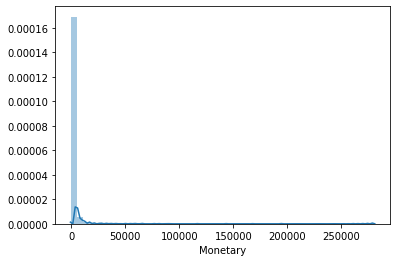

In [99]:
ax = sns.distplot(M1)

In [101]:
RFMScores

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


# Clustering with K-Means based on RFM

k-means clustering needs continuous variables and works best with relatively normally-distributed, standardized input variables. Therefore, data normalization and standardization was important here; otherwise, input variables with larger variances will tend to have correspondingly greater influence on the results.
logarithm transformation was used to the three input variables to reduce positive skew and then standardize them. We have seen the below plot earlier. It’s given below for comparison purpose.

Referensi:

https://medium.com/@ibobriakov/top-8-data-science-use-cases-in-sales-783f17f2128a

In [103]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.preprocessing import RobustScaler

In [104]:
RFMScores['RecencyRS'] = RobustScaler().fit_transform(RFMScores['Recency'].values.reshape(-1, 1))
RFMScores['FrequencyRS'] = RobustScaler().fit_transform(RFMScores['Frequency'].values.reshape(-1, 1))
RFMScores['MonetaryRS'] = RobustScaler().fit_transform(RFMScores['Monetary'].values.reshape(-1, 1))
RFMScores

,Recency,Frequency,Monetary,RecencyRS,FrequencyRS,MonetaryRS
CustomerID,,,,,,
12346.0,325,1,77183.60,2.204409,-0.493827,56.505563
12347.0,2,182,4310.00,-0.384770,1.740741,2.689159
12348.0,75,31,1797.24,0.200401,-0.123457,0.833511
12349.0,18,73,1757.55,-0.256513,0.395062,0.804201
12350.0,310,17,334.40,2.084168,-0.296296,-0.246781
...,...,...,...,...,...,...
18280.0,277,10,180.60,1.819639,-0.382716,-0.360361
18281.0,180,7,80.82,1.042084,-0.419753,-0.434047
18282.0,7,12,178.05,-0.344689,-0.358025,-0.362244


In [105]:
#mencari jumlah cluster terbaik

In [106]:
k = range(1, 15)
inertia = []

for i in k:
    model = KMeans(n_clusters = i)
    model.fit(RFMScores[['RecencyRS','FrequencyRS', 'MonetaryRS']])
    inertia.append(model.inertia_)

print(k)
print(inertia)

range(1, 15)
[227360.4894374735, 98180.38416900171, 59882.397109685706, 45842.836233001886, 33981.91534717908, 26559.768184446668, 22108.029475504114, 18964.15867641501, 16248.419810615907, 14359.794412080675, 12111.548364457958, 10293.52413215622, 9126.129119903442, 8277.003187330662]


Text(0, 0.5, 'inertia sum squared error')

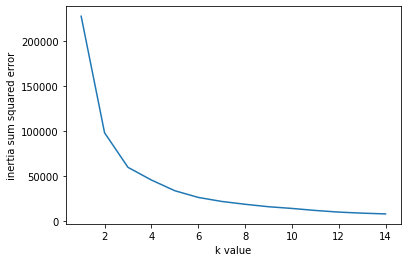

In [107]:
plt.plot(k, inertia) #melihat pada sudut siku dalam plot, mungkin sekitar 4
plt.xlabel('k value')
plt.ylabel('inertia sum squared error')

In [108]:
# 3 cluster adalah yang terbaik,lanjut ke fitting model

In [109]:
model_KM = KMeans(n_clusters = 3, max_iter = 100) #tingkatkan iterasi untuk meningkatkan kualitas prediksi 

model_KM.fit(RFMScores[['RecencyRS','FrequencyRS','MonetaryRS']])

KMeans(max_iter=100, n_clusters=3)

In [110]:
model_KM.labels_

array([2, 0, 0, ..., 0, 0, 0])

In [111]:
RFMScores['cluster'] = model_KM.predict(RFMScores[['RecencyRS','FrequencyRS','MonetaryRS',]])
RFMScores.head()

,Recency,Frequency,Monetary,RecencyRS,FrequencyRS,MonetaryRS,cluster
CustomerID,,,,,,,
12346.0,325,1,77183.60,2.204409,-0.493827,56.505563,2
12347.0,2,182,4310.00,-0.384770,1.740741,2.689159,0
12348.0,75,31,1797.24,0.200401,-0.123457,0.833511,0
12349.0,18,73,1757.55,-0.256513,0.395062,0.804201,0
12350.0,310,17,334.40,2.084168,-0.296296,-0.246781,0


In [112]:
K0=RFMScores[RFMScores['cluster']==0]
K0

,Recency,Frequency,Monetary,RecencyRS,FrequencyRS,MonetaryRS,cluster
CustomerID,,,,,,,
12347.0,2,182,4310.00,-0.384770,1.740741,2.689159,0
12348.0,75,31,1797.24,0.200401,-0.123457,0.833511,0
12349.0,18,73,1757.55,-0.256513,0.395062,0.804201,0
12350.0,310,17,334.40,2.084168,-0.296296,-0.246781,0
12352.0,36,85,2506.04,-0.112224,0.543210,1.356953,0
...,...,...,...,...,...,...,...
18280.0,277,10,180.60,1.819639,-0.382716,-0.360361,0
18281.0,180,7,80.82,1.042084,-0.419753,-0.434047,0
18282.0,7,12,178.05,-0.344689,-0.358025,-0.362244,0


In [113]:
K1=RFMScores[RFMScores['cluster']==1]
K1

,Recency,Frequency,Monetary,RecencyRS,FrequencyRS,MonetaryRS,cluster
CustomerID,,,,,,,
14646.0,1,2076,280206.02,-0.392786,25.123457,206.435532,1
16446.0,0,3,168472.50,-0.400802,-0.469136,123.921476,1
17450.0,8,336,194390.79,-0.336673,3.641975,143.061867,1
18102.0,0,431,259657.30,-0.400802,4.814815,191.260513,1


In [114]:
K2=RFMScores[RFMScores['cluster']==2]
K2

,Recency,Frequency,Monetary,RecencyRS,FrequencyRS,MonetaryRS,cluster
CustomerID,,,,,,,
12346.0,325,1,77183.60,2.204409,-0.493827,56.505563,2
12415.0,24,714,124914.53,-0.208417,8.308642,91.754364,2
12748.0,0,4412,33053.19,-0.400802,53.962963,23.915709,2
12931.0,21,82,42055.96,-0.232465,0.506173,30.564162,2
13089.0,2,1814,58762.08,-0.384770,21.888889,42.901460,2
13694.0,3,568,65039.62,-0.376754,6.506173,47.537358,2
14088.0,10,589,50491.81,-0.320641,6.765432,36.793950,2
14096.0,4,5111,65164.79,-0.368737,62.592593,47.629795,2
14156.0,9,1395,117210.08,-0.328657,16.716049,86.064706,2


In [115]:
K0.describe()

,Recency,Frequency,Monetary,RecencyRS,FrequencyRS,MonetaryRS,cluster
count,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000,4314.0
mean,92.407742,82.456421,1530.323863,0.339942,0.511808,0.636396,0.0
std,100.015252,126.991148,2810.107303,0.801725,1.567792,2.075235,0.0
min,0.000000,1.000000,3.750000,-0.400802,-0.493827,-0.490963,0.0
25%,17.000000,17.000000,305.560000,-0.264529,-0.296296,-0.268079,0.0
50%,51.000000,40.500000,663.630000,0.008016,-0.006173,-0.003648,0.0
75%,142.000000,97.000000,1630.857500,0.737475,0.691358,0.710639,0.0
max,373.000000,2677.000000,39916.500000,2.589178,32.543210,28.984193,0.0


In [116]:
K1.describe()

,Recency,Frequency,Monetary,RecencyRS,FrequencyRS,MonetaryRS,cluster
count,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0
mean,2.25000,711.500000,225681.652500,-0.382766,8.277778,166.169847,1.0
std,3.86221,927.992996,52849.649889,0.030960,11.456704,39.028923,0.0
min,0.00000,3.000000,168472.500000,-0.400802,-0.469136,123.921476,1.0
25%,0.00000,252.750000,187911.217500,-0.400802,2.614198,138.276769,1.0
50%,0.50000,383.500000,227024.045000,-0.396794,4.228395,167.161190,1.0
75%,2.75000,842.250000,264794.480000,-0.378758,9.891975,195.054268,1.0
max,8.00000,2076.000000,280206.020000,-0.336673,25.123457,206.435532,1.0


In [117]:
K2.describe()

,Recency,Frequency,Monetary,RecencyRS,FrequencyRS,MonetaryRS,cluster
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0
mean,34.900000,1706.450000,69133.257000,-0.121042,20.561111,50.560467,2.0
std,85.626422,2228.587102,29463.996533,0.686384,27.513421,21.758858,0.0
min,0.000000,1.000000,33053.190000,-0.400802,-0.493827,23.915709,2.0
25%,1.750000,213.250000,51268.427500,-0.386774,2.126543,37.367474,2.0
50%,4.000000,651.500000,59697.415000,-0.368737,7.537037,43.592195,2.0
75%,12.750000,1952.000000,78100.410000,-0.298597,23.592593,57.182617,2.0
max,325.000000,7676.000000,143711.170000,2.204409,94.259259,105.635489,2.0


Bisa kita lihat di cluster 0,1,2 memiliki mean dari monetary yang berbeda-beda
di cluster 0 yaitu rata ratanya sekitar 2rb poundsterling
di cluster 1 yaitu rata ratanya sekitar 200rb poundsterling
dan di clsuter 2 rata ratanya sekitar 50rb poundsterling

maka dari itu kita urutkan clusternya berdasarkan revenue rata2 yang didapat perusahan dari setiap kluster yaitu:
    cluster 1 = berjumlah 5 orang
    clsuter 2 = berjumlah 27 orang
    cluster 0 = berjumlah 4306 orang

lalu kita ingin tau berapa persen sih dari setiap cluster kontribusinya terhadap pendapatan perusahaan.

In [120]:
total=RFMScores['Monetary']
total

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2045.53
18287.0     1837.28
Name: Monetary, Length: 4338, dtype: float64

In [121]:
df = pd.DataFrame(total)
df

,Monetary
CustomerID,
12346.0,77183.60
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,178.05


In [122]:
#Total sum per column: 
df.loc['Total',:]= df.sum(axis=0)
df

# #Total sum per row: 
# df.loc[:,'Total'] = df.sum(axis=1)

,Monetary
CustomerID,
12346.0,77183.600
12347.0,4310.000
12348.0,1797.240
12349.0,1757.550
12350.0,334.400
...,...
18281.0,80.820
18282.0,178.050
18283.0,2045.530


In [123]:
df.loc['Total']

Monetary    8887208.894
Name: Total, dtype: float64

In [124]:
dfK1 = pd.DataFrame(K1['Monetary'])
dfK1

,Monetary
CustomerID,
14646.0,280206.02
16446.0,168472.50
17450.0,194390.79
18102.0,259657.30


In [125]:
dfK1.loc['Total',:]= dfK1.sum(axis=0)
dfK1


,Monetary
CustomerID,
14646.0,280206.02
16446.0,168472.50
17450.0,194390.79
18102.0,259657.30
Total,902726.61


In [126]:
dfK1.loc['Total']

Monetary    902726.61
Name: Total, dtype: float64

In [127]:
dfK2 = pd.DataFrame(K2['Monetary'])
dfK2

,Monetary
CustomerID,
12346.0,77183.60
12415.0,124914.53
12748.0,33053.19
12931.0,42055.96
13089.0,58762.08
13694.0,65039.62
14088.0,50491.81
14096.0,65164.79
14156.0,117210.08


In [128]:
dfK2.loc['Total',:]= dfK2.sum(axis=0)
dfK2

,Monetary
CustomerID,
12346.0,77183.60
12415.0,124914.53
12748.0,33053.19
12931.0,42055.96
13089.0,58762.08
13694.0,65039.62
14088.0,50491.81
14096.0,65164.79
14156.0,117210.08


In [129]:
dfK2.loc['Total']

Monetary    1382665.14
Name: Total, dtype: float64

In [130]:
dfK0 = pd.DataFrame(K0['Monetary'])
dfK0

,Monetary
CustomerID,
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
12352.0,2506.04
...,...
18280.0,180.60
18281.0,80.82
18282.0,178.05


In [131]:
dfK0.loc['Total',:]= dfK0.sum(axis=0)
dfK0

,Monetary
CustomerID,
12347.0,4310.000
12348.0,1797.240
12349.0,1757.550
12350.0,334.400
12352.0,2506.040
...,...
18281.0,80.820
18282.0,178.050
18283.0,2045.530


In [132]:
print(df.loc['Total'])
print(dfK1.loc['Total'])
print(dfK2.loc['Total'])
print(dfK0.loc['Total'])

Monetary    8887208.894
Name: Total, dtype: float64
Monetary    902726.61
Name: Total, dtype: float64
Monetary    1382665.14
Name: Total, dtype: float64
Monetary    6601817.144
Name: Total, dtype: float64


In [133]:
1046437.78+ 1542442.72+6298328.394

8887208.894000001

In [134]:
K1persen=(1046437.78/8887208.894)*100
K1persen

11.77465042716031

In [135]:
K1persen/5

2.354930085432062

In [136]:
K2persen=(1542442.72/8887208.894)*100
K2persen

17.355760828817086

In [137]:
K2persen/27

0.642805956622855

In [138]:
K0persen=(6298328.394/8887208.894)*100
K0persen

70.86958874402262

In [139]:
K0persen/4305

0.016462157664116753

In [140]:
#artinya kalo kita kehilangan 1 saja pelanggan kita di cluster 1,kita kehilangan sekitar 2,3 persen pendapatan kita.

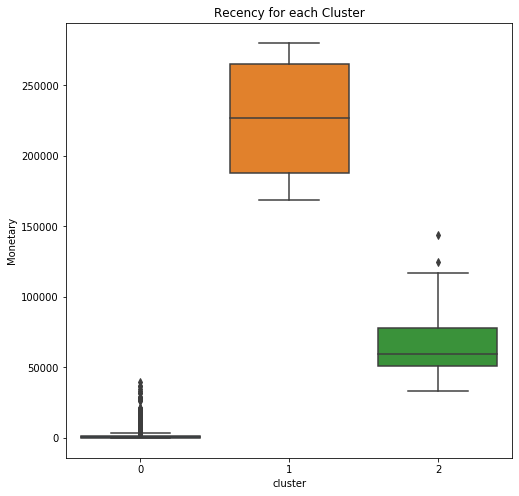

In [141]:

# analyzing Recency
fig, ax = plt.subplots(figsize=(8,8))
plt.title('Recency for each Cluster')
sns.boxplot(RFMScores['cluster'],RFMScores['Monetary']);

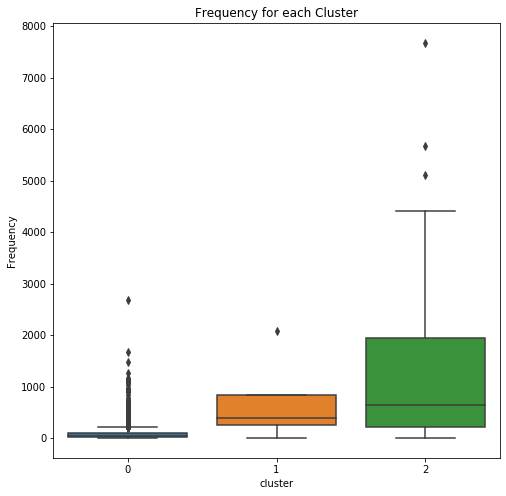

In [142]:

# analyzing Recency
fig, ax = plt.subplots(figsize=(8,8))
plt.title('Frequency for each Cluster')
sns.boxplot(RFMScores['cluster'],RFMScores['Frequency']);

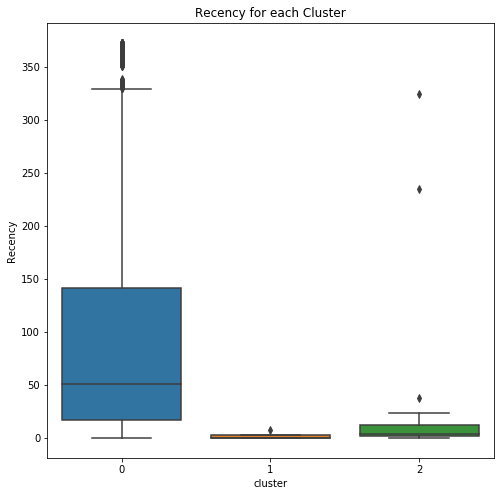

In [143]:

# analyzing Recency
fig, ax = plt.subplots(figsize=(8,8))
plt.title('Recency for each Cluster')
sns.boxplot(RFMScores['cluster'],RFMScores['Recency']);

Cluster 0 has high recency rate, which means it's been the longest for any cluster when it comes to Last Purchase Date.
CLuster 1 and 2 have low recency rate, which is good. They can be our Gold and Silver Customers.

In [144]:
RFMScores

,Recency,Frequency,Monetary,RecencyRS,FrequencyRS,MonetaryRS,cluster
CustomerID,,,,,,,
12346.0,325,1,77183.60,2.204409,-0.493827,56.505563,2
12347.0,2,182,4310.00,-0.384770,1.740741,2.689159,0
12348.0,75,31,1797.24,0.200401,-0.123457,0.833511,0
12349.0,18,73,1757.55,-0.256513,0.395062,0.804201,0
12350.0,310,17,334.40,2.084168,-0.296296,-0.246781,0
...,...,...,...,...,...,...,...
18280.0,277,10,180.60,1.819639,-0.382716,-0.360361,0
18281.0,180,7,80.82,1.042084,-0.419753,-0.434047,0
18282.0,7,12,178.05,-0.344689,-0.358025,-0.362244,0


# lalu selanjutnya kita membagi lagi setiap cluster secara terperinci

In [146]:
#Split into four segments using quantiles
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 98.0},
 'Monetary': {0.25: 306.48249999999996,
  0.5: 668.5700000000002,
  0.75: 1660.5974999999999},
 'RecencyRS': {0.25: -0.26452905811623245, 0.5: 0.0, 0.75: 0.7354709418837675},
 'FrequencyRS': {0.25: -0.2962962962962963,
  0.5: 0.0,
  0.75: 0.7037037037037037},
 'MonetaryRS': {0.25: -0.26739789456582364,
  0.5: -4.197810583297587e-17,
  0.75: 0.7326021054341765},
 'cluster': {0.25: 0.0, 0.5: 0.0, 0.75: 0.0}}

In [147]:
## bikin fungsi buat labelin per segmen berdasarkan RFM.kalo Rscoring itu buat Recency karena semakin kecil makin dapet kelas 4 atau semakin banyak RFMnya,semakin banyak RFM semakin loyal atau semakin bagus customernya

In [148]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4


In [149]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head()


,Recency,Frequency,Monetary,RecencyRS,FrequencyRS,MonetaryRS,cluster,R,F,M
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,2.204409,-0.493827,56.505563,2,1,1,4
12347.0,2,182,4310.00,-0.384770,1.740741,2.689159,0,4,4,4
12348.0,75,31,1797.24,0.200401,-0.123457,0.833511,0,2,2,4
12349.0,18,73,1757.55,-0.256513,0.395062,0.804201,0,3,3,4
12350.0,310,17,334.40,2.084168,-0.296296,-0.246781,0,1,1,2


In [150]:
#gabungi RFMnya biar enak diliat

In [154]:
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)


In [155]:
RFMScores.head()

,Recency,Frequency,Monetary,RecencyRS,FrequencyRS,MonetaryRS,cluster,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,,,,,
12346.0,325,1,77183.60,2.204409,-0.493827,56.505563,2,1,1,4,114,6
12347.0,2,182,4310.00,-0.384770,1.740741,2.689159,0,4,4,4,444,12
12348.0,75,31,1797.24,0.200401,-0.123457,0.833511,0,2,2,4,224,8
12349.0,18,73,1757.55,-0.256513,0.395062,0.804201,0,3,3,4,334,10
12350.0,310,17,334.40,2.084168,-0.296296,-0.246781,0,1,1,2,112,4


In [156]:
#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

,Recency,Frequency,Monetary,RecencyRS,FrequencyRS,MonetaryRS,cluster,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,,,,,
12346.0,325,1,77183.60,2.204409,-0.493827,56.505563,2,1,1,4,114,6
12347.0,2,182,4310.00,-0.384770,1.740741,2.689159,0,4,4,4,444,12
12348.0,75,31,1797.24,0.200401,-0.123457,0.833511,0,2,2,4,224,8
12349.0,18,73,1757.55,-0.256513,0.395062,0.804201,0,3,3,4,334,10
12350.0,310,17,334.40,2.084168,-0.296296,-0.246781,0,1,1,2,112,4


ada dua cara cara bacanya,kita bisa liat pertama dari RFM score,cuman RFM sroe ga menggambarkan terlalu detail,makanya perlu kita bedah lagi

In [157]:
import re

In [158]:
segt_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][2-3]': 'At risk',
    r'[1-2]4': 'Can\'t loose them',
    r'2[1-2]': 'About to sleep',
    r'22': 'Need attention',
    r'[2-3][3-4]': 'Loyal customers',
    r'31': 'Promising',
    r'41': 'New customers',
    r'[3-4][1-2]': 'Potential loyalists',
    r'4[3-4]': 'Champions'
}

RFMScores['Segment'] = RFMScores['R'].map(str) + RFMScores['F'].map(str)
RFMScores['Segment'] = RFMScores['Segment'].replace(segt_map, regex=True)
RFMScores

,Recency,Frequency,Monetary,RecencyRS,FrequencyRS,MonetaryRS,cluster,R,F,M,RFMGroup,RFMScore,Segment
CustomerID,,,,,,,,,,,,,
12346.0,325,1,77183.60,2.204409,-0.493827,56.505563,2,1,1,4,114,6,Hibernating
12347.0,2,182,4310.00,-0.384770,1.740741,2.689159,0,4,4,4,444,12,Champions
12348.0,75,31,1797.24,0.200401,-0.123457,0.833511,0,2,2,4,224,8,Hibernating
12349.0,18,73,1757.55,-0.256513,0.395062,0.804201,0,3,3,4,334,10,Loyal customers
12350.0,310,17,334.40,2.084168,-0.296296,-0.246781,0,1,1,2,112,4,Hibernating
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,1.819639,-0.382716,-0.360361,0,1,1,1,111,3,Hibernating
18281.0,180,7,80.82,1.042084,-0.419753,-0.434047,0,1,1,1,111,3,Hibernating
18282.0,7,12,178.05,-0.344689,-0.358025,-0.362244,0,4,1,1,411,6,New customers


In [159]:
RFMScores['Segment']

CustomerID
12346.0        Hibernating
12347.0          Champions
12348.0        Hibernating
12349.0    Loyal customers
12350.0        Hibernating
                ...       
18280.0        Hibernating
18281.0        Hibernating
18282.0      New customers
18283.0          Champions
18287.0    Loyal customers
Name: Segment, Length: 4338, dtype: object

In [160]:
segment= RFMScores['Segment']

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

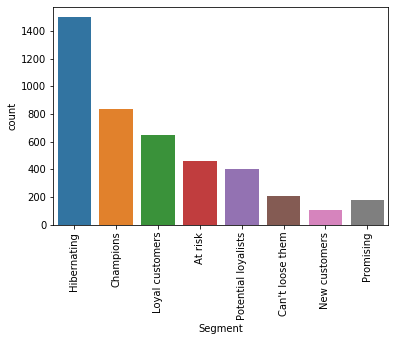

In [161]:
ax = sns.countplot(RFMScores['Segment'])
plt.xticks(rotation = 90)

In [162]:
#terserah kita mau bagi 4 segmen atau 5 segmen
#ini RFM score semakin jumlahnya kecil semakin bagus

In [163]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Bronze', 'Silver', 'Gold', 'Platinum']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()


,CustomerID,Recency,Frequency,Monetary,RecencyRS,FrequencyRS,MonetaryRS,cluster,R,F,M,RFMGroup,RFMScore,Segment,RFM_Loyalty_Level
0,12346.0,325,1,77183.60,2.204409,-0.493827,56.505563,2,1,1,4,114,6,Hibernating,Silver
1,12347.0,2,182,4310.00,-0.384770,1.740741,2.689159,0,4,4,4,444,12,Champions,Platinum
2,12348.0,75,31,1797.24,0.200401,-0.123457,0.833511,0,2,2,4,224,8,Hibernating,Gold
3,12349.0,18,73,1757.55,-0.256513,0.395062,0.804201,0,3,3,4,334,10,Loyal customers,Gold
4,12350.0,310,17,334.40,2.084168,-0.296296,-0.246781,0,1,1,2,112,4,Hibernating,Bronze


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

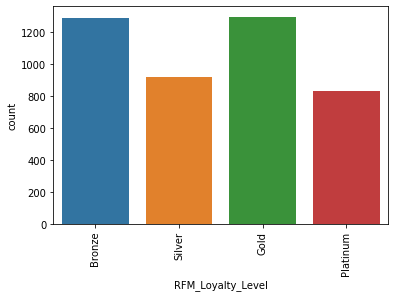

In [164]:
ax = sns.countplot(RFMScores['RFM_Loyalty_Level'])
plt.xticks(rotation = 90)

#kita lihat cluster umum dan khususnya yang terbaru

In [168]:
K1=RFMScores[RFMScores['cluster']==1]
K1

,Recency,Frequency,Monetary,RecencyRS,FrequencyRS,MonetaryRS,cluster,R,F,M,RFMGroup,RFMScore,Segment,RFM_Loyalty_Level
CustomerID,,,,,,,,,,,,,,
14646.0,1,2076,280206.02,-0.392786,25.123457,206.435532,1,4,4,4,444,12,Champions,Platinum
16446.0,0,3,168472.50,-0.400802,-0.469136,123.921476,1,4,1,4,414,9,New customers,Gold
17450.0,8,336,194390.79,-0.336673,3.641975,143.061867,1,4,4,4,444,12,Champions,Platinum
18102.0,0,431,259657.30,-0.400802,4.814815,191.260513,1,4,4,4,444,12,Champions,Platinum


In [176]:
K2=RFMScores[RFMScores['cluster']==2]
K2

,Recency,Frequency,Monetary,RecencyRS,FrequencyRS,MonetaryRS,cluster,R,F,M,RFMGroup,RFMScore,Segment,RFM_Loyalty_Level
CustomerID,,,,,,,,,,,,,,
12346.0,325,1,77183.60,2.204409,-0.493827,56.505563,2,1,1,4,114,6,Hibernating,Silver
12415.0,24,714,124914.53,-0.208417,8.308642,91.754364,2,3,4,4,344,11,Loyal customers,Platinum
12748.0,0,4412,33053.19,-0.400802,53.962963,23.915709,2,4,4,4,444,12,Champions,Platinum
12931.0,21,82,42055.96,-0.232465,0.506173,30.564162,2,3,3,4,334,10,Loyal customers,Gold
13089.0,2,1814,58762.08,-0.384770,21.888889,42.901460,2,4,4,4,444,12,Champions,Platinum
13694.0,3,568,65039.62,-0.376754,6.506173,47.537358,2,4,4,4,444,12,Champions,Platinum
14088.0,10,589,50491.81,-0.320641,6.765432,36.793950,2,4,4,4,444,12,Champions,Platinum
14096.0,4,5111,65164.79,-0.368737,62.592593,47.629795,2,4,4,4,444,12,Champions,Platinum
14156.0,9,1395,117210.08,-0.328657,16.716049,86.064706,2,4,4,4,444,12,Champions,Platinum


In [177]:
K0=RFMScores[RFMScores['cluster']==0]
K0

,Recency,Frequency,Monetary,RecencyRS,FrequencyRS,MonetaryRS,cluster,R,F,M,RFMGroup,RFMScore,Segment,RFM_Loyalty_Level
CustomerID,,,,,,,,,,,,,,
12347.0,2,182,4310.00,-0.384770,1.740741,2.689159,0,4,4,4,444,12,Champions,Platinum
12348.0,75,31,1797.24,0.200401,-0.123457,0.833511,0,2,2,4,224,8,Hibernating,Gold
12349.0,18,73,1757.55,-0.256513,0.395062,0.804201,0,3,3,4,334,10,Loyal customers,Gold
12350.0,310,17,334.40,2.084168,-0.296296,-0.246781,0,1,1,2,112,4,Hibernating,Bronze
12352.0,36,85,2506.04,-0.112224,0.543210,1.356953,0,3,3,4,334,10,Loyal customers,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,1.819639,-0.382716,-0.360361,0,1,1,1,111,3,Hibernating,Bronze
18281.0,180,7,80.82,1.042084,-0.419753,-0.434047,0,1,1,1,111,3,Hibernating,Bronze
18282.0,7,12,178.05,-0.344689,-0.358025,-0.362244,0,4,1,1,411,6,New customers,Silver


In [181]:
# kita save clustering kita

In [ ]:
#Ubah cluster 1,2,0 = jadi A,B,C

In [190]:
RFMScores.loc[RFMScores['cluster']==1, 'cluster'] = 'A'
RFMScores.loc[RFMScores['cluster']==2, 'cluster'] = 'B'
RFMScores.loc[RFMScores['cluster']==0, 'cluster'] = 'C'
RFMScores

,Recency,Frequency,Monetary,RecencyRS,FrequencyRS,MonetaryRS,cluster,R,F,M,RFMGroup,RFMScore,Segment,RFM_Loyalty_Level
CustomerID,,,,,,,,,,,,,,
12346.0,325,1,77183.60,2.204409,-0.493827,56.505563,B,1,1,4,114,6,Hibernating,Silver
12347.0,2,182,4310.00,-0.384770,1.740741,2.689159,C,4,4,4,444,12,Champions,Platinum
12348.0,75,31,1797.24,0.200401,-0.123457,0.833511,C,2,2,4,224,8,Hibernating,Gold
12349.0,18,73,1757.55,-0.256513,0.395062,0.804201,C,3,3,4,334,10,Loyal customers,Gold
12350.0,310,17,334.40,2.084168,-0.296296,-0.246781,C,1,1,2,112,4,Hibernating,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,1.819639,-0.382716,-0.360361,C,1,1,1,111,3,Hibernating,Bronze
18281.0,180,7,80.82,1.042084,-0.419753,-0.434047,C,1,1,1,111,3,Hibernating,Bronze
18282.0,7,12,178.05,-0.344689,-0.358025,-0.362244,C,4,1,1,411,6,New customers,Silver


In [191]:
K1.to_csv('K1.csv')

In [192]:
K2.to_csv('K2.csv')

In [193]:
K0.to_csv('K0.csv')

In [194]:
RFMScores.to_csv('Cluster.csv')

In [195]:
data.to_csv('datasiap.csv')